## 互评作业1：数据探索性分析与数据预处理：Chicago Building Violations
学号：1120183560 姓名：刘文楷

### 1. 数据集：wine-reviews
1个csv文件：
- building-violations.csv

读取数据：

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [19]:
dirpath_cbv = "ChicagoBuildingViolations-data/building-violations.csv"

In [21]:
data_cbv = pd.read_csv(dirpath_cbv)
data_cbv.head()

,ID,VIOLATION LAST MODIFIED DATE,VIOLATION DATE,VIOLATION CODE,VIOLATION STATUS,VIOLATION STATUS DATE,VIOLATION DESCRIPTION,VIOLATION LOCATION,VIOLATION INSPECTOR COMMENTS,VIOLATION ORDINANCE,...,SSA,LATITUDE,LONGITUDE,LOCATION,Community Areas,Zip Codes,Boundaries - ZIP Codes,Census Tracts,Wards,Historical Wards 2003-2015
0,6392482,2019-12-04T12:40:09.000,2019-12-04T00:00:00.000,CN196019,OPEN,NaN,NO POSTED ADDRESS,OTHER : :OTHER,BUILDING ADRESSES - INCOMPLETE WITH MISSING #'S.,Post address of building in conspicuous place ...,...,NaN,41.749169,-87.602551,"{'latitude': '41.749169067345306', 'human_addr...",40.0,21546.0,61.0,247.0,35.0,9.0
1,6392480,2019-12-04T12:40:09.000,2019-12-04T00:00:00.000,CN061014,OPEN,NaN,REPAIR EXTERIOR WALL,OTHER : :OTHER,WEST AND SOUTH ELEVATIONS / EXTERIOR WALLS - M...,Failed to maintain the exterior walls of a bui...,...,NaN,41.749169,-87.602551,"{'latitude': '41.749169067345306', 'human_addr...",40.0,21546.0,61.0,247.0,35.0,9.0
2,6392335,2019-12-04T14:00:12.000,2019-12-04T00:00:00.000,CN138106,OPEN,NaN,STOP/REMOVE NUISANCE,OTHER : :OTHER,YARD AREA; ABANDON VEHICLE.,Remove and stop nuisance. (7-28-060),...,NaN,41.711751,-87.537842,"{'latitude': '41.71175105491413', 'human_addre...",49.0,21202.0,25.0,528.0,47.0,47.0
3,6391883,2019-12-04T08:32:01.000,2019-12-04T00:00:00.000,CN197039,OPEN,NaN,RELOCATE SMOKE DETECTOR,INTERIOR:003 :,HALLWAY - SMOKE DETECTOR - 4FT BELOW CEILING.,Relocate improperly installed smoke detectors....,...,25.0,41.844521,-87.712416,"{'latitude': '41.84452110252742', 'human_addre...",32.0,21569.0,57.0,755.0,28.0,14.0
4,6392369,2019-12-04T14:14:24.000,2019-12-04T00:00:00.000,CN065034,OPEN,NaN,REPAIR WINDOW SILLS,OTHER : :OTHER,EAST WINDOW SILLS; OPEN JOINTS.,Failed to maintain window sill in good repair ...,...,NaN,41.753908,-87.562784,"{'latitude': '41.75390787131238', 'human_addre...",39.0,22538.0,24.0,246.0,37.0,43.0


显示数据信息

In [22]:
data_cbv = data_cbv.drop(columns=['ID', 'VIOLATION DESCRIPTION', 'VIOLATION INSPECTOR COMMENTS'])

data_cbv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677788 entries, 0 to 1677787
Data columns (total 29 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   VIOLATION LAST MODIFIED DATE  1677788 non-null  object 
 1   VIOLATION DATE                1677788 non-null  object 
 2   VIOLATION CODE                1677788 non-null  object 
 3   VIOLATION STATUS              1677788 non-null  object 
 4   VIOLATION STATUS DATE         641589 non-null   object 
 5   VIOLATION LOCATION            780506 non-null   object 
 6   VIOLATION ORDINANCE           1630207 non-null  object 
 7   INSPECTOR ID                  1677788 non-null  object 
 8   INSPECTION NUMBER             1677788 non-null  int64  
 9   INSPECTION STATUS             1677772 non-null  object 
 10  INSPECTION WAIVED             1677788 non-null  object 
 11  INSPECTION CATEGORY           1677788 non-null  object 
 12  DEPARTMENT BUREAU           

## 2. 数据分析
### 2.1 数据可视化和摘要
#### 2.1.1 标称属性

In [23]:
title = ['VIOLATION LAST MODIFIED DATE', 'VIOLATION DATE', 'VIOLATION CODE', 'VIOLATION STATUS', 'VIOLATION STATUS DATE', 'VIOLATION LOCATION', 'VIOLATION ORDINANCE', 'INSPECTOR ID', 'INSPECTION NUMBER', 'INSPECTION STATUS', 'INSPECTION WAIVED', 'INSPECTION CATEGORY', 'DEPARTMENT BUREAU', 'ADDRESS', 'STREET NUMBER', 'STREET DIRECTION', 'STREET NAME', 'STREET TYPE', 'PROPERTY GROUP', 'SSA', 'LOCATION', 'Community Areas','Zip Codes','Boundaries - ZIP Codes','Census Tracts']

In [24]:
# 由于本数据集属性太多，这里仅显示violation status的分析结果
title[3]

'VIOLATION STATUS'

In [25]:
getattr(data_cbv, title[3]).value_counts()

OPEN        1030958
COMPLIED     641247
NO ENTRY       5583
Name: VIOLATION STATUS, dtype: int64

<AxesSubplot:>

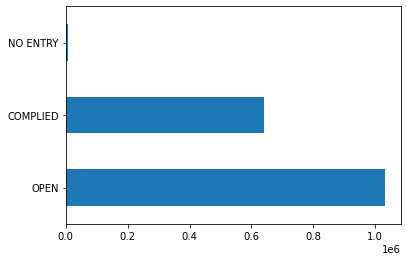

In [26]:
data_cbv[title[3]].value_counts().head(10).plot.barh()

#### 2.2.2 数值属性
直接调用describe函数给出数据的基本统计量

In [27]:
data_cbv.describe()

,INSPECTION NUMBER,STREET NUMBER,PROPERTY GROUP,SSA,LATITUDE,LONGITUDE,Community Areas,Zip Codes,Boundaries - ZIP Codes,Census Tracts,Wards,Historical Wards 2003-2015
count,1.677788e+06,1.677788e+06,1.677788e+06,321521.000000,1.676278e+06,1.676278e+06,1.675509e+06,1.676278e+06,1.675509e+06,1.676243e+06,1.675509e+06,1.675509e+06
mean,8.049798e+06,4.150382e+03,2.020547e+05,33.769197,4.184566e+01,-8.767266e+01,3.873350e+01,1.933197e+04,3.118135e+01,3.800659e+02,2.513030e+01,2.750858e+01
std,4.555757e+06,2.893493e+03,1.862796e+05,17.428210,8.742421e-02,5.760184e-02,2.008963e+01,5.606228e+03,1.943930e+01,2.290619e+02,1.498690e+01,1.530544e+01
min,2.655750e+05,1.000000e+00,1.000000e+03,1.000000,4.164467e+01,-8.791444e+01,1.000000e+00,4.299000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,2.304416e+06,1.648000e+03,2.056000e+04,22.000000,4.177090e+01,-8.771392e+01,2.400000e+01,2.119000e+04,1.500000e+01,1.790000e+02,1.200000e+01,1.400000e+01
50%,1.041875e+07,3.747000e+03,1.543230e+05,34.000000,4.185400e+01,-8.766985e+01,3.600000e+01,2.156900e+04,2.800000e+01,3.740000e+02,2.500000e+01,2.800000e+01
75%,1.168728e+07,6.228000e+03,3.669840e+05,49.000000,4.191350e+01,-8.763288e+01,5.800000e+01,2.224800e+04,5.200000e+01,5.720000e+02,3.700000e+01,4.100000e+01
max,1.305092e+07,1.377000e+04,6.779750e+05,69.000000,4.202269e+01,-8.752468e+01,7.700000e+01,2.262000e+04,6.100000e+01,8.010000e+02,5.000000e+01,5.300000e+01


数据可视化

直方图：

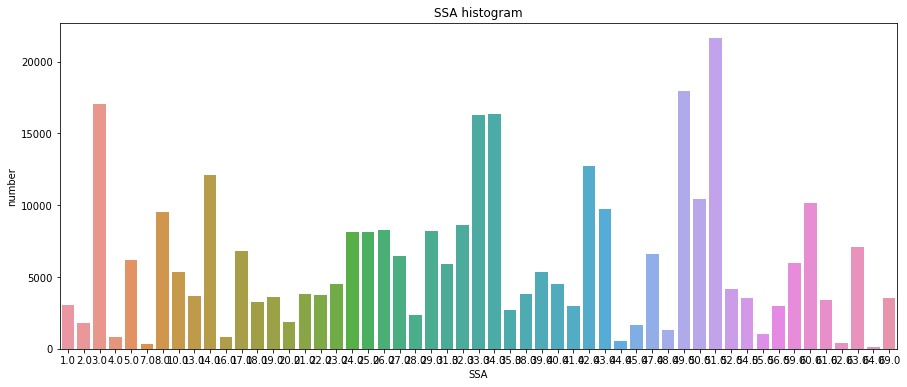

In [28]:
def histogram(data, x, y ,title):
    plt.figure(figsize = (15,6))
    plt.title(title)
    sns.set_color_codes("pastel")
    sns.barplot(x=x, y=y, data=df)
    locs, labels = plt.xticks()
    plt.show()

#SSA
temp = data_cbv['SSA'].value_counts()
df = pd.DataFrame({'SSA':temp.index, 'number':temp.values})

histogram(df, 'SSA', 'number', 'SSA histogram')  

盒图：

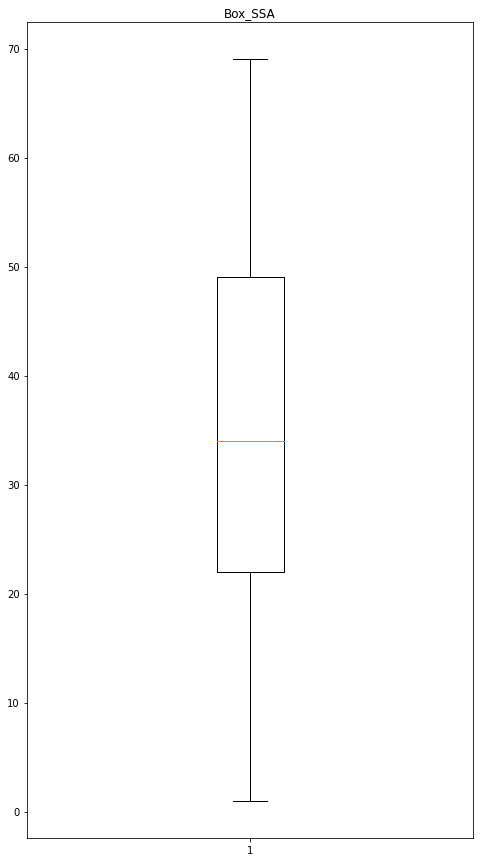

In [30]:
fig = plt.figure(figsize=(8, 15))
plt.boxplot(data_cbv['SSA'].loc[data_cbv['SSA']<300], notch=False, sym='o', vert=True)
t = plt.title('Box_SSA')

## 3. 数据缺失处理
### 3.1 将缺失部分剔除

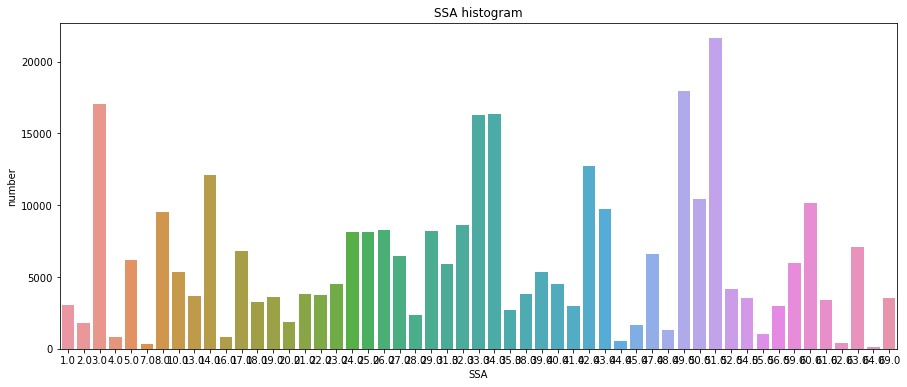

In [31]:
data_delete = data_cbv['SSA'].dropna()

temp = data_delete.value_counts()
df = pd.DataFrame({'SSA':temp.index, 'number':temp.values})

histogram(df, 'SSA', 'number', 'SSA histogram')

### 3.2 用最高频率来填补缺失值

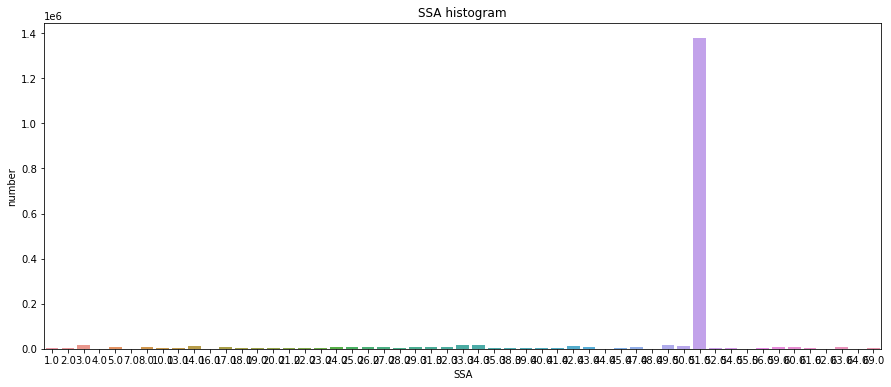

In [34]:
data_most = data_cbv['SSA'].fillna(data_cbv['SSA'].mode()[0])
temp = data_most.value_counts()
df = pd.DataFrame({'SSA':temp.index, 'number':temp.values})
histogram(df, 'SSA', 'number', 'SSA histogram')

### 3.3 通过属性的相关关系来填补缺失值
使用纬度LATITUDE填补经度LONGITUDE

In [35]:
data_fill = pd.DataFrame(data_cbv, columns=['LATITUDE', 'LONGITUDE'])
data_fill.head(10)

,LATITUDE,LONGITUDE
0,41.749169,-87.602551
1,41.749169,-87.602551
2,41.711751,-87.537842
3,41.844521,-87.712416
4,41.753908,-87.562784
5,41.806815,-87.611539
6,41.753908,-87.562784
7,41.749169,-87.602551
8,41.711751,-87.537842
9,41.748732,-87.659904


<AxesSubplot:>

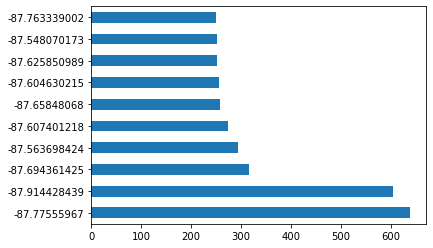

In [36]:
data_fill['LONGITUDE'].value_counts().head(10).plot.barh()

### 3.4 通过数据对象之间的相似性来填补缺失值


In [38]:
data_sim = data_cbv[['LATITUDE','LONGITUDE']]
point2price = {}
for row in data_sim.iterrows():
    if point2price.get(row[1]['LONGITUDE'], None):
        if not pd.isnull(row[1]['LATITUDE']):
            point2price[row[1]['LONGITUDE']][0] += row[1]['LATITUDE']
            point2price[row[1]['LONGITUDE']][1] += 1
    else:
        if not pd.isnull(row[1]['LATITUDE']):
            point2price[row[1]['LONGITUDE']] = [row[1]['LATITUDE'], 1]

In [39]:
for k in point2price.keys():
    point2price[k][0] = round(point2price[k][0] / point2price[k][1], 4)

In [40]:
for row in data_sim.iterrows():
    if pd.isnull(row[1]['LATITUDE']):
        try:
            row[1]['LATITUDE'] = point2price[row[1]['LONGITUDE']][0]
        except:
            continue

In [ ]:
#对被填充后的price画直方图
temp = data_sim['LATITUDE'].value_counts()
df = pd.DataFrame({'LATITUDE':temp.index, 'number':temp.values})

histogram(df, 'LATITUDE', 'number', 'LATITUDE histogram')